In [13]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="mobilenet_v1_1.0_224_quant.tflite")
interpreter.allocate_tensors()

In [15]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [67]:
# Read the image and decode to a tensor
image_path='plane.jpg' 
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img,(224, 224))
#Preprocess the image to required size and cast
input_shape = input_details[0]['shape']
input_tensor= np.array(np.expand_dims(img_resized,0), dtype=np.uint8)

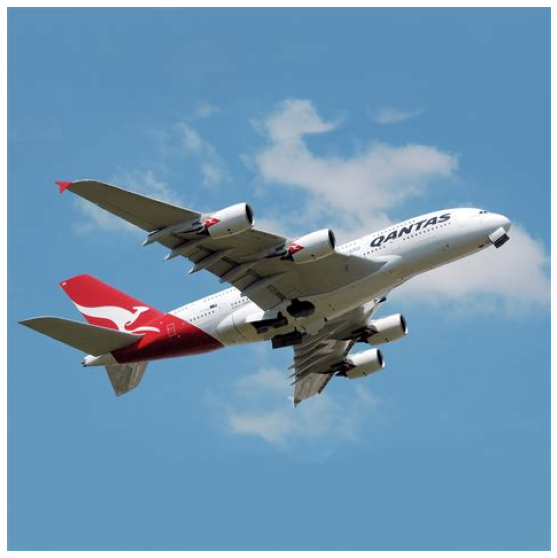

In [68]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img);

In [87]:
input_index = interpreter.get_input_details()[0]["index"]
interpreter.set_tensor(input_index, input_tensor)

In [88]:
#Run the inference
interpreter.invoke()
output_details = interpreter.get_output_details()[0]
output = np.squeeze(interpreter.get_tensor(output_details['index']))

In [89]:
if output_details['dtype'] == np.uint8:
    scale, zero_point = output_details['quantization']
    output = scale * (output - zero_point)

In [90]:
ordered = np.argpartition(-output, 1)

In [91]:
with open("labels_mobilenet_quant_v1_224.txt", 'r') as f:
    labels = f.read().splitlines() 

In [96]:
for i in range(5):
    if output[ordered[i]] > 0.2:
        print(labels[ordered[i]], output[ordered[i]])

airliner 0.87890625
